# SAT Analysis Project
## Data Science Immersive
## June 15, 2016
### Rebecca Vitale

In [ ]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in notebook:
%matplotlib inline

In [117]:
import plotly.tools as tls

tls.set_credentials_file(username='forzavitale', api_key='h5sssz3rvn')

In [118]:
sat_scores = pd.read_csv('/Users/Rebecca/DSI-NYC-1/projects/01-projects-weekly/project-01/assets/sat_scores.csv')
sat_scores.columns = ['state', 'rate', 'verbal', 'math']
# correct 'NB' to 'NE' for Nebraska
sat_scores = sat_scores.set_value(40, 'state', 'NE')
sat_scores.set_index('state', inplace = True)
# take out 'All' line
sat_scores = sat_scores[0:51]
#print sat_scores

##### 1. What does the data describe?

####  This data set describes corresponding average math and verbal SAT scores, by state, for the entire United States (including Washington, D.C.).  Also included is the rate of participation in the SAT administration, although it is unclear how this figure was calculated; for the purposes below, it is assumed to be a percentage.  The columns in the data set are the math score, verbal score, state, and participation rate.  

##### 2. Does the data look complete? Are there any obvious issues with the observations?

####  There are no obvious issues with the data except that the "All" row should be removed since it clearly is a function of the rest of the values.  Also, the abbreviation for Nebraska must be changed from 'NB' to 'NE.'

##### 3. Create a data dictionary for the dataset.

In [119]:
sat_dict = sat_scores.T.to_dict('list')
#print sat_dict

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [120]:
sat_scores['state'] = sat_scores.index
sat_list = np.array(sat_scores)

##### 5. Print the data

In [114]:
print sat_list

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [77]:


#states = []
#[states.append(sat_list[i][3]) for i in range(len(sat_list))]
#new_list = []
#for i in range(len(sat_list)):
#    new_list.append([sat_list[i][0], sat_list[i][1], sat_list[i][2]])
#print states
#sat_list = new_list
#print sat_list

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
[[82, 509, 510], [81, 499, 513], [79, 511, 515], [77, 495, 505], [72, 520, 516], [71, 501, 499], [71, 500, 499], [69, 511, 506], [69, 506, 500], [68, 510, 501], [67, 501, 499], [65, 508, 510], [65, 493, 499], [63, 491, 489], [60, 499, 501], [57, 486, 488], [56, 482, 474], [55, 526, 526], [54, 498, 499], [53, 527, 527], [53, 493, 499], [52, 485, 515], [51, 514, 510], [51, 498, 517], [34, 523, 525], [33, 509, 515], [31, 539, 542], [26, 534, 439], [23, 539, 539], [18, 527, 512], [17, 543, 542], [13, 562, 553], [13, 551, 542], [12, 576, 589], [12, 550, 550], [11, 547, 545], [11, 561, 572], [9, 580, 589], [9, 577, 580], [9, 559, 554], [8, 562, 568], [8, 567, 561], [8, 577, 577], [7, 564, 5

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [ ]:
print states

##### 8. Print the types of each column

In [177]:
print type(sat_scores['rate'])
print type(sat_scores['math'])
print type(sat_scores['verbal'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

#### They seem to be working fine down below.

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [ ]:
new_sat_dict = sat_scores.T.to_dict('list')

##### 11. Create a dictionary with the values for each of the numeric columns

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [171]:
print "rate min: %s" %sat_scores['rate'].min()
print "rate max: %s" %sat_scores['rate'].max()
print "verbal min: %s" %sat_scores['verbal'].min()
print "verbal max: %s" %sat_scores['verbal'].max()
print "math min: %s" %sat_scores['math'].min()
print "math max: %s" %sat_scores['math'].max()

rate min: 4
rate max: 82
verbal min: 482
verbal max: 593
math min: 439
math max: 603


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [123]:
def nice_std(col):
    '''This function takes a column argument and returns the standard deviation of its numeric values.'''
    std = np.sqrt(sum([((int(col[i]) - (float(sum(col)) / len(sat_scores)))**2)/len(sat_scores) for i in range(len(sat_scores))]))
    return std

print "Standard Deviations"
print "rate: %s" %nice_std(sat_scores['rate'])
print "math: %s" %nice_std(sat_scores['math'])
print "verbal: %s" %nice_std(sat_scores['verbal'])
#print np.std(sat_scores['rate])  #to check mine

Standard Deviations
rate: 27.2792386761
math: 35.9298731731
verbal: 33.0319826842


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

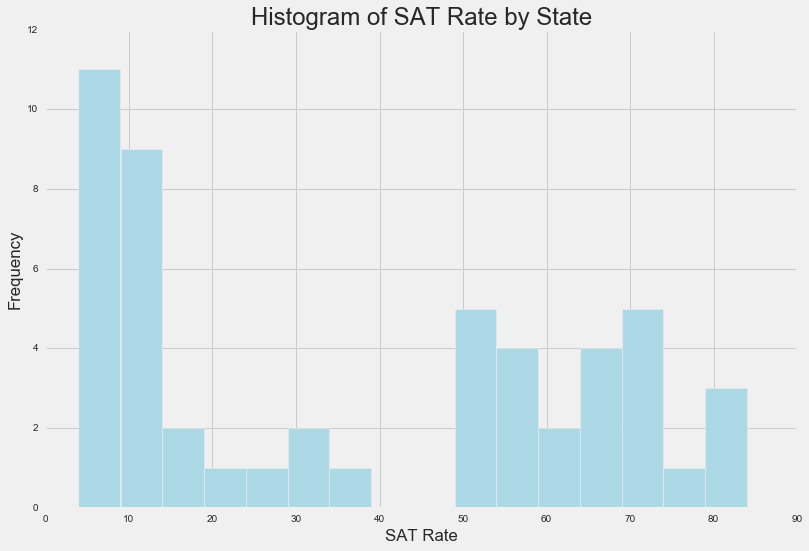

In [142]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hist = plt.hist(sat_scores['rate'], color = 'lightblue', bins = range(min(sat_scores['rate']), max(sat_scores['rate']) + 5, 5))

plt.title('Histogram of SAT Rate by State', fontsize = 24)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('SAT Rate')

plt.show()

#### Rate does not appear to have a unimodal normal distribution; it is perhaps bimodal with peaks in the 10's and 60's.  With respect to later, these data suggest a heat map with colors on the more extreme ends of the spectrum represented on the map.

##### 15. Plot the Math distribution

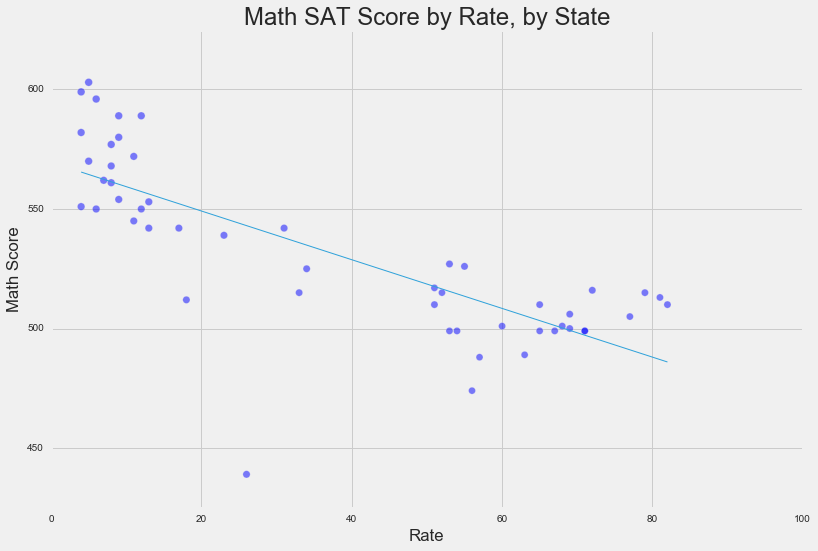

In [172]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

# make area of plot point proportional to verbal score
area = sat_scores['verbal'] / 10

sat_scatter = plt.scatter(sat_scores['rate'], sat_scores['math'], s=area, alpha=0.5)

plt.title('Math SAT Score by Rate, by State', fontsize = 24)

# y label
plt.ylabel('Math Score')

# x label
plt.xlabel('Rate')

# set the figure boundaries
plt.xlim([0, 100])
plt.ylim([425, 625])

m, b = np.polyfit(sat_scores['rate'], sat_scores['math'], 1)

plt.plot(sat_scores['rate'], m*sat_scores['rate'] + b, '-', linewidth = 1.0)

plt.show()

#### That outlier near the x-axis is Ohio; we'll take it out soon, not sure what is going on with math with them over there.

##### 16. Plot the Verbal distribution

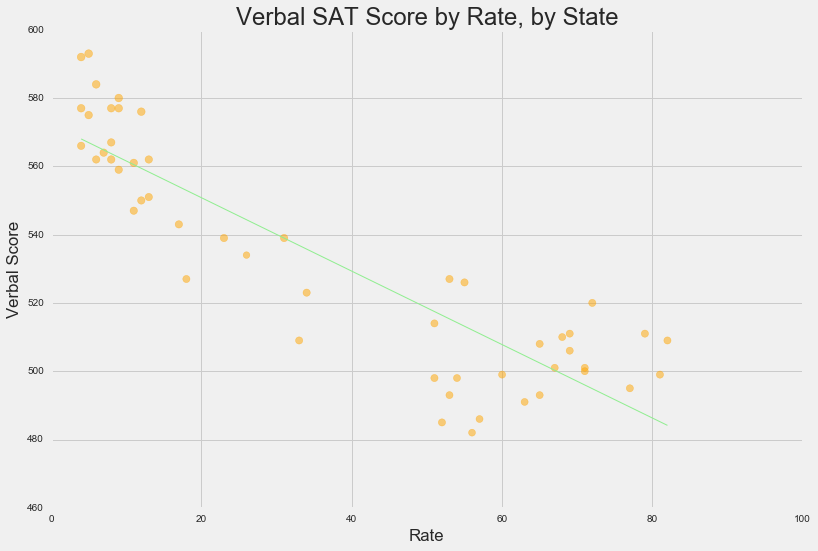

In [173]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

# make area of plot point proportional to math score
area = sat_scores['math'] / 10

sat_scatter = plt.scatter(sat_scores['rate'], sat_scores['verbal'], s=area, alpha=0.5, color = 'orange')

plt.title('Verbal SAT Score by Rate, by State', fontsize = 24)

# y label
plt.ylabel('Verbal Score')

# x label
plt.xlabel('Rate')

# set the figure boundaries
plt.xlim([0, 100])
#plt.ylim([425, 625])

m, b = np.polyfit(sat_scores['rate'], sat_scores['verbal'], 1)

plt.plot(sat_scores['rate'], m*sat_scores['rate'] + b, '-', linewidth = 1.0, color = 'lightgreen')

plt.show()

##### 17. What is the typical assumption for data distribution?

#### The typical assumption for the vast majority of data distributions is that they are normal (Gaussian), with fixed population mean and standard deviation.

##### 18. Does that distribution hold true for our data?

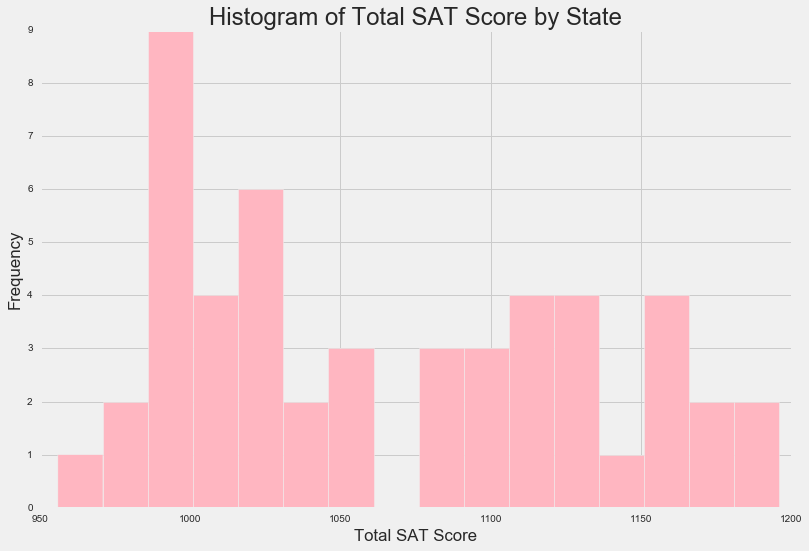

In [235]:
# Let's check out a histrogram of total SAT score, first:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

total_score = df['math'] + df['verbal']
df_hist = plt.hist(total_score, color = 'lightpink', bins = range(min(total_score), max(total_score) + 15, 15))

plt.title('Histogram of Total SAT Score by State', fontsize = 24)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Total SAT Score')

plt.show()

#### Judging by the histogram of total SAT score (above), the data do not appear to be normally distributed.  We can check this with a built-in scipy function:

In [185]:
print "math p-value: %s" %stats.normaltest(df['math'])[1]
print "verbal p-value: %s" %stats.normaltest(df['verbal'])[1]
print "rate p-value: %s" %stats.normaltest(df['rate'])[1]

math p-value: 0.0400597480508
verbal p-value: 5.82174801887e-06
rate p-value: 2.56225432182e-20


#### Thus, at the alpha = 0.05 significance level, we reject the null hypothesis that each variable follows a normal distribution.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

In [167]:
# Find and remove outlier near bottom of Math vs. Rate plot
df = sat_scores.sort_values(['math'], ascending=1)
# Delete Ohio!  line: 27	534	439	OH	26  
df = df.drop(['OH'])

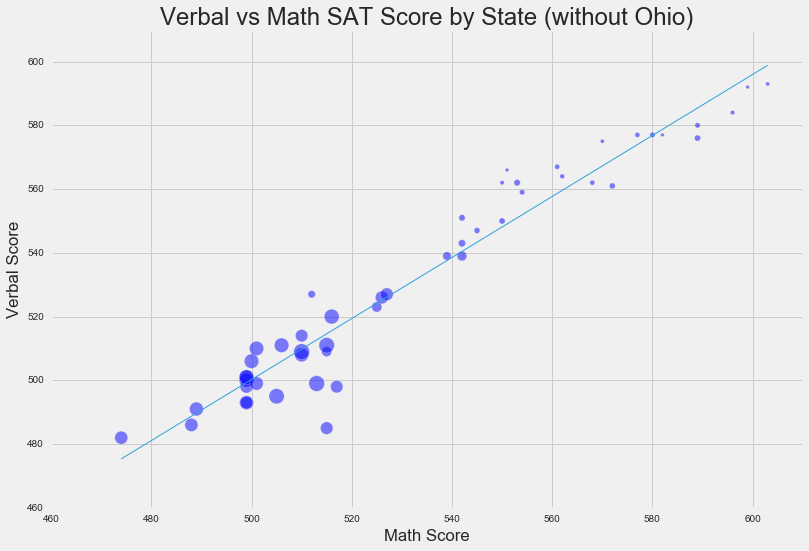

In [169]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

# make area of plot point proportional to testing rate of corresponding state
area = 3 * df['rate']  

df_scatter = plt.scatter(df['math'], df['verbal'], s=area, alpha=0.5)

plt.title('Verbal vs Math SAT Score by State (without Ohio)', fontsize = 24)

# y label
plt.ylabel('Verbal Score')

# x label
plt.xlabel('Math Score')

# set the figure boundaries
plt.xlim([460, 610])
plt.ylim([460, 610])

df_m, df_b = np.polyfit(df['math'], df['verbal'], 1)

plt.plot(df['math'], df_m*df['math'] + df_b, '-', linewidth = 1.0)

plt.show()

In [181]:
stats.normaltest(df['math'])
stats.normaltest(df['verbal'])

NormaltestResult(statistic=24.107819988861742, pvalue=5.8217480188715927e-06)

##### 20. Are there any interesting relationships to note?

#### Yes!  Math and Verbal scores appear to be correlated; checking with a new Pearson Correlation Coefficient function below, we see there is strong evidence that, indeed, the two variables are linearly correlated.

#### Additionally, rate seems to be correlated with lower scores (and, thus, lower total score), as we can see from the distinct pattern of dot sizes distributed in the plot.  The larger the dot, the higher the rate of participation.

In [170]:
def pearsonCC(X, Y):
    '''This is the Pearson Correlation Coefficient function I wrote'''
    X_deviation = []
    Y_deviation = []
    [X_deviation.append(i - np.mean(X)) for i in X]
    [Y_deviation.append(i - np.mean(Y)) for i in Y]
    
    sqrt_X_deviation_sq = np.sqrt(np.sum([i ** 2 for i in X_deviation]))
    sqrt_Y_deviation_sq = np.sqrt(np.sum([j ** 2 for j in Y_deviation]))
    
    xy_prod = []
    for x_d, y_d in zip(X_deviation, Y_deviation):
        xy_prod.append(x_d * y_d)
    sum_XY_deviation = sum(xy_prod)
    
    pearson_r = sum_XY_deviation / (sqrt_X_deviation_sq * sqrt_Y_deviation_sq)
    
    return pearson_r

# print result only if agrees with np.corrcoef
if np.corrcoef(df['math'], df['verbal'])[0, 1] - pearsonCC(df['math'], df['verbal']) < 0.000001:
    print "Pearson coefficient: %s" %pearsonCC(df['math'], df['verbal'])

Pearson coefficient: 0.969265100964


##### 21. Create box plots for each variable. 

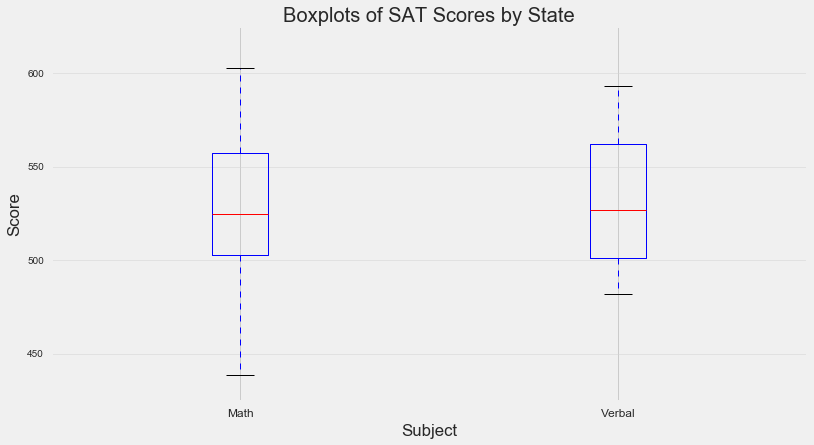

In [256]:
from matplotlib.patches import Polygon

data = [sat_scores['math'], sat_scores['verbal']]
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Boxplots of SAT Scores by State')
ax1.set_xlabel('Subject')
ax1.set_ylabel('Score')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(425, 625)
xtickNames = plt.setp(ax1, xticklabels=['Math', 'Verbal'])
plt.setp(xtickNames, fontsize=12)

plt.show()

## http://matplotlib.org/examples/pylab_examples/boxplot_demo2.html

##### Below are some calculations to go along with the boxplot visuals above; note in particular that the two variables have similar sample means and different spreads (math's being larger).

In [253]:
def round_this(float_list):
    '''A function to round a list of float objects.'''
    rounded_list = []
    for i in float_list:
        x = round(i)
        rounded_list.append(x)
    return rounded_list

def some_stats(col_name, col_data):
    '''A function to print out info on a column argument.'''
    print "Column Summary"
    print "Name: %s" %col_name
    print "Mean: %s" %np.mean(col_data)
    print "Median: %s" %np.median(col_data)
    rounded_contents = round_this(col_data)
    print "Mode (rounded): %s" %str(stats.mode(rounded_contents)[0][0])
    print "Variance: %s" %np.var(col_data)
    print "Standard deviation: %s" %np.std(col_data)
    
    return

print some_stats('math', sat_scores['math'])

Column Summary
Name: math
Mean: 531.843137255
Median: 525.0
Mode (rounded): 499.0
Variance: 1290.95578624
Standard deviation: 35.9298731731
None


In [252]:
print some_stats('verbal', sat_scores['verbal'])

Column Summary
Name: verbal
Mean: 532.529411765
Median: 527.0
Mode (rounded): 562.0
Variance: 1091.11188005
Standard deviation: 33.0319826842
None


In [260]:
from IPython.display import Image
Image("Users/Rebecca/DSI-projects/projects/SAT_tableau.png")

IPython.core.display.Image

![SAT_tableau](SAT_tableau.png "SAT_tableau")